In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
# Loadng the data
df=pd.read_csv('covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
# creating a new columns of year and month by seperating it from date.
df["Year"]=df['Date'].apply(lambda x:x.split("-")[0])
df["Month"]=df['Date'].apply(lambda x:x.split("-")[1])

In [4]:
df.shape # Checking shape

(49068, 12)

In [5]:
df.columns # Checking columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region', 'Year', 'Month'],
      dtype='object')

In [6]:
df.isnull().sum()  # Checking null values.

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
Year                  0
Month                 0
dtype: int64

In [7]:
df.drop("Province/State",axis=1,inplace=True) # Dropping this column cause of high null values.
df["Date"]=pd.to_datetime(df["Date"])# Converting date in Datetime feature.
df.set_index("Date",inplace=True) # Setting Date as an index


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49068 entries, 2020-01-22 to 2020-07-27
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Confirmed       49068 non-null  int64  
 4   Deaths          49068 non-null  int64  
 5   Recovered       49068 non-null  int64  
 6   Active          49068 non-null  int64  
 7   WHO Region      49068 non-null  object 
 8   Year            49068 non-null  object 
 9   Month           49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.1+ MB


In [9]:
df

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Year,Month
Date,,,,,,,,,,
2020-01-22,Afghanistan,33.939110,67.709953,0,0,0,0,Eastern Mediterranean,2020,01
2020-01-22,Albania,41.153300,20.168300,0,0,0,0,Europe,2020,01
2020-01-22,Algeria,28.033900,1.659600,0,0,0,0,Africa,2020,01
2020-01-22,Andorra,42.506300,1.521800,0,0,0,0,Europe,2020,01
2020-01-22,Angola,-11.202700,17.873900,0,0,0,0,Africa,2020,01
...,...,...,...,...,...,...,...,...,...,...
2020-07-27,Sao Tome and Principe,0.186400,6.613100,865,14,734,117,Africa,2020,07
2020-07-27,Yemen,15.552727,48.516388,1691,483,833,375,Eastern Mediterranean,2020,07
2020-07-27,Comoros,-11.645500,43.333300,354,7,328,19,Africa,2020,07


In [10]:
df["Country/Region"].unique() # Unique values in country / region coloumn.

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [11]:

df["Country/Region"].nunique() # Total number of unique observation.

187

In [12]:
# Grouping the data on basis of country/region and getting the sum of records.
sumd=df.groupby("Country/Region").sum()
sumd

,Lat,Long,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,,
Afghanistan,6380.552680,12729.471164,1936390,49098,798240,1089052
Albania,7736.820400,3791.640400,196702,5708,118877,72117
Algeria,5270.373200,312.004800,1179755,77972,755897,345886
Andorra,7991.184400,286.098400,94404,5423,69074,19907
Angola,-2106.107600,3360.293200,22662,1078,6573,15011
...,...,...,...,...,...,...
West Bank and Gaza,6007.013600,6623.841600,233461,1370,61124,170967
Western Sahara,4552.514000,-2422.530400,901,63,648,190
Yemen,2923.912676,9121.080944,67180,17707,23779,25694


In [13]:
sumd.drop(['Lat', 'Long'],axis=1,inplace=True) # Dropping the unwanted columns

In [14]:
sumd

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,1936390,49098,798240,1089052
Albania,196702,5708,118877,72117
Algeria,1179755,77972,755897,345886
Andorra,94404,5423,69074,19907
Angola,22662,1078,6573,15011
...,...,...,...,...
West Bank and Gaza,233461,1370,61124,170967
Western Sahara,901,63,648,190
Yemen,67180,17707,23779,25694


In [15]:
deaths=sumd.Deaths.sort_values(ascending=False) # Focusing on death count of each country
deaths

Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
                    ...   
Bhutan                   0
Mongolia                 0
Timor-Leste              0
Seychelles               0
Greenland                0
Name: Deaths, Length: 187, dtype: int64

In [16]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

<AxesSubplot:title={'center':'Top 15 Countries for Covid 19 DEATH COUNT'}, xlabel='Country', ylabel='Death Count'>

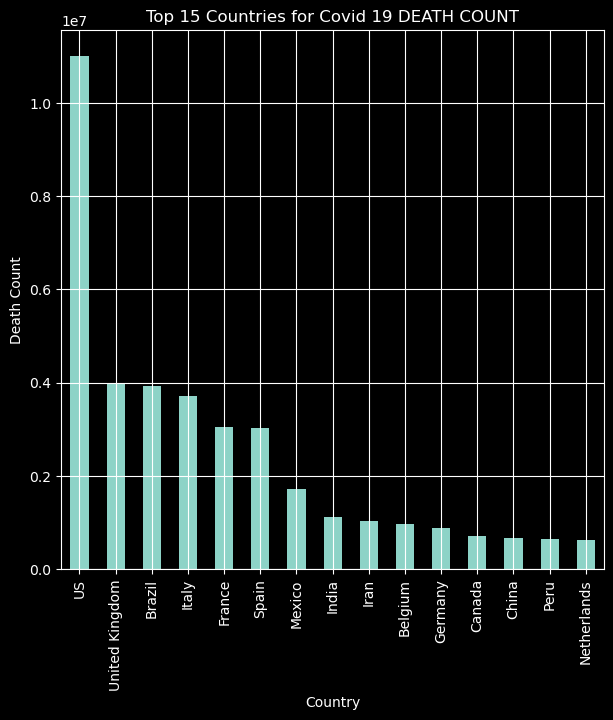

In [17]:
# visualising the top 15 data in deaths variable.
deaths.head(15).plot(figsize=(7,7),kind="bar",grid=True,xlabel="Country",ylabel="Death Count", title="Top 15 Countries for Covid 19 DEATH COUNT")

In [18]:
yearwise=df.groupby('Country/Region')# Creating a new variable by group by function on Country/ Region
yearwise=list(yearwise) # Converting data in list.

In [19]:
india=yearwise[79][1] # Selecting data of India

In [20]:
india=india.drop(['Country/Region', 'Lat', 'Long','WHO Region'],axis=1)

In [21]:
df[df['Country/Region']=='India'] # Another simpler way to fecth data of india

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Year,Month
Date,,,,,,,,,,
2020-01-22,India,20.593684,78.96288,0,0,0,0,South-East Asia,2020,01
2020-01-23,India,20.593684,78.96288,0,0,0,0,South-East Asia,2020,01
2020-01-24,India,20.593684,78.96288,0,0,0,0,South-East Asia,2020,01
2020-01-25,India,20.593684,78.96288,0,0,0,0,South-East Asia,2020,01
2020-01-26,India,20.593684,78.96288,0,0,0,0,South-East Asia,2020,01
...,...,...,...,...,...,...,...,...,...,...
2020-07-23,India,20.593684,78.96288,1288108,30601,817209,440298,South-East Asia,2020,07
2020-07-24,India,20.593684,78.96288,1337024,31358,849432,456234,South-East Asia,2020,07
2020-07-25,India,20.593684,78.96288,1385635,32060,885573,468002,South-East Asia,2020,07


In [22]:
india

,Confirmed,Deaths,Recovered,Active,Year,Month
Date,,,,,,
2020-01-22,0,0,0,0,2020,01
2020-01-23,0,0,0,0,2020,01
2020-01-24,0,0,0,0,2020,01
2020-01-25,0,0,0,0,2020,01
2020-01-26,0,0,0,0,2020,01
...,...,...,...,...,...,...
2020-07-23,1288108,30601,817209,440298,2020,07
2020-07-24,1337024,31358,849432,456234,2020,07
2020-07-25,1385635,32060,885573,468002,2020,07


In [23]:
month=india.groupby('Month').sum() # Grouping the data on India on basis of Months,

In [24]:
month


,Confirmed,Deaths,Recovered,Active
Month,,,,
01,2,0,0,2
02,84,0,42,42
03,10252,226,818,9208
04,447607,14417,85811,347379
05,3088494,94154,1216954,1777386
06,10951713,331856,5916008,4703849
07,26385312,671178,16564087,9150047


<AxesSubplot:title={'center':'COVID 19 data of INDIA from 1st to 7th month'}, xlabel='Month', ylabel='Count'>

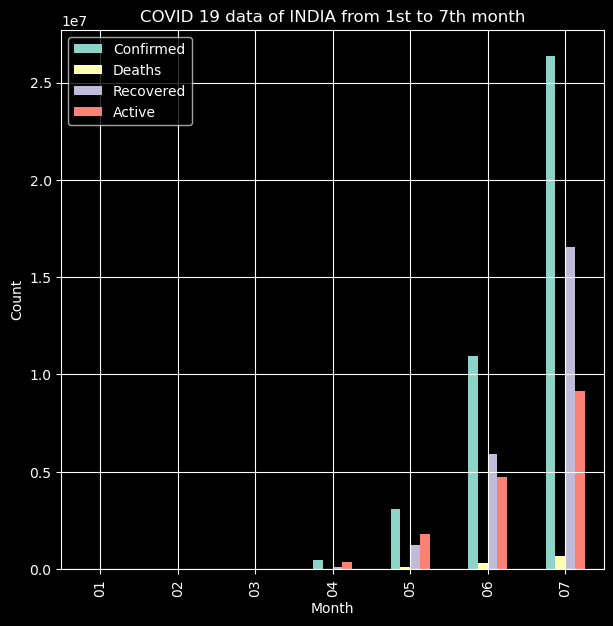

In [25]:
# Visalising the data in month variable to answer the question.
month.plot(figsize=(7,7),kind="bar",grid=True,xlabel="Month",ylabel="Count", title="COVID 19 data of INDIA from 1st to 7th month")

In [26]:
indiasum=sumd.loc["India"]
indiasum

Confirmed    40883464
Deaths        1111831
Recovered    23783720
Active       15987913
Name: India, dtype: int64

<AxesSubplot:title={'center':'COVID 19 data of INDIA'}, xlabel='Type', ylabel='Count'>

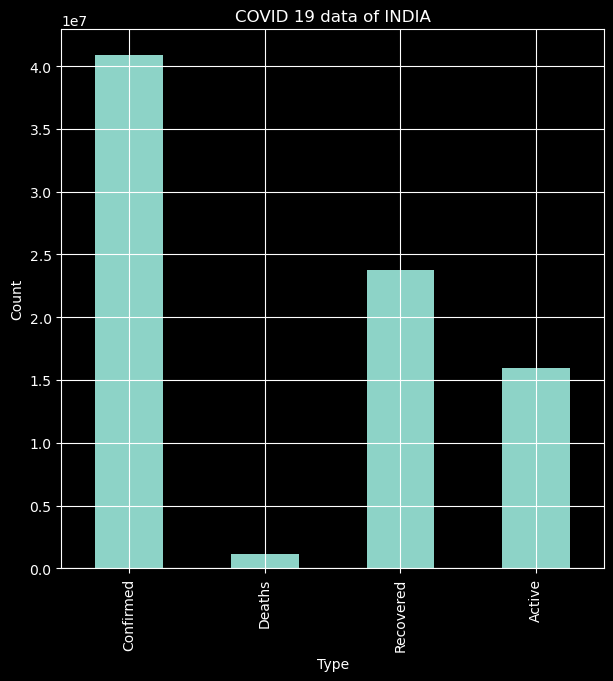

In [27]:
indiasum.plot(figsize=(7,7),kind="bar",grid=True,xlabel="Type",ylabel="Count", title="COVID 19 data of INDIA")

In [29]:
USnIndsum=sumd.loc[["US","India"]] # Selecting sum count of US and India .
USnIndsum

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
US,224345948,11011411,56353416,156981121
India,40883464,1111831,23783720,15987913


<AxesSubplot:title={'center':'COVID 19 data of US and INDIA'}, xlabel='Type', ylabel='Count'>

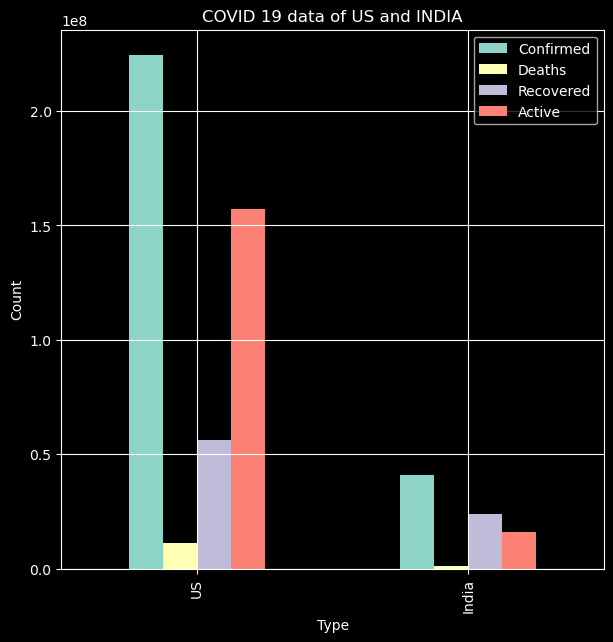

In [30]:
# Visalising the above data of comparisum
USnIndsum.plot(figsize=(7,7),kind="bar",grid=True,xlabel="Type",ylabel="Count", title="COVID 19 data of US and INDIA")